In [1]:
##############################################################################
#                            LOGISTIC REGRESSION
##############################################################################

########## TABLE OF CONTENTS #############
# 1. Data read in
# 2. Data quality check
# 3. Model Training - Manual Features Selection 
# 4. Model Evaluation
# 5. Model Training - GridSearchCV and Evaluation

# Dataset -> Heart -> Taken from https://hastie.su.domains/ElemStatLearn/
######################


from Modules import *



# The Logistic Regression model requires several key assumptions. These are as follows:-
# 1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.
# 2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.
# 3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. 
      # It means that the independent variables should not be too highly correlated with each other.
# 4. Logistic Regression model assumes linearity of independent variables and log odds.
# 5. The success of Logistic Regression model depends on the sample sizes. Typically, 
      # it requires a large sample size to achieve the high accuracy.

munch is not present in the environment. See https://trading-ig.readthedocs.io/en/latest/faq.html#optional-dependencies
can't import config from config file


1. DATA READ IN

In [2]:
df = pd.read_csv("Heart.txt", index_col=0)
df

df['TrainTestFlag'] = 0
df.iloc[pd.Series(df.index).sample(frac=0.5, random_state=1234), df.columns.get_loc('TrainTestFlag')] = 1
print("Train vs Test sample")
print(df['TrainTestFlag'].value_counts())
print("")
print(df['chd'].value_counts())
print("")
df.shape
df.info()


# sbp		systolic blood pressure
# tobacco	cumulative tobacco (kg)
# ldl		low densiity lipoprotein cholesterol
# adiposity
# famhist	family history of heart disease (Present, Absent)
# typea		type-A behavior
# obesity
# alcohol	current alcohol consumption
# age		age at onset
# chd		response, coronary heart disease  -> TARGET VARIABLE

Train vs Test sample
TrainTestFlag
0    231
1    231
Name: count, dtype: int64

chd
0    302
1    160
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 1 to 463
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sbp            462 non-null    int64  
 1   tobacco        462 non-null    float64
 2   ldl            462 non-null    float64
 3   adiposity      462 non-null    float64
 4   famhist        462 non-null    object 
 5   typea          462 non-null    int64  
 6   obesity        462 non-null    float64
 7   alcohol        462 non-null    float64
 8   age            462 non-null    int64  
 9   chd            462 non-null    int64  
 10  TrainTestFlag  462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.3+ KB


2. DATA QUALITY CHECK

Checking duplicates
0

Univariate Analysis


,Feature,Feature Type,# Records,# Zero's,% Zero's,# Missing,% Missing,Minimum,Mean,Median,Maximum,Skewness,Kurtosis,Normality (p > 0.05)
0,sbp,int64,462.0,0.0,0.00,0.0,0.0,101.00,138.33,134.00,218.00,1.18,1.78,0.000
0,tobacco,float64,462.0,107.0,2.11,0.0,0.0,0.00,3.64,2.00,31.20,2.08,5.97,0.000
0,ldl,float64,462.0,0.0,0.00,0.0,0.0,0.98,4.74,4.34,15.33,1.31,2.88,0.000
0,adiposity,float64,462.0,0.0,0.00,0.0,0.0,6.74,25.41,26.12,42.49,-0.21,-0.70,0.000
0,typea,int64,462.0,0.0,0.00,0.0,0.0,13.00,53.10,53.00,78.00,-0.35,0.47,0.002
0,obesity,float64,462.0,0.0,0.00,0.0,0.0,14.70,26.04,25.80,46.58,0.91,2.26,0.000
0,alcohol,float64,462.0,110.0,2.16,0.0,0.0,0.00,17.04,7.51,147.19,2.31,6.42,0.000
0,age,int64,462.0,0.0,0.00,0.0,0.0,15.00,42.82,45.00,64.00,-0.38,-1.02,0.000
0,chd,int64,462.0,302.0,5.94,0.0,0.0,0.00,0.35,0.00,1.00,0.65,-1.59,0.000
0,TrainTestFlag,int64,462.0,231.0,4.55,0.0,0.0,0.00,0.50,0.50,1.00,0.00,-2.01,0.000


famhist
Absent     270
Present    192
Name: count, dtype: int64


Train Sample - Correlation Analysis


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,familiarity
sbp,1.000000,0.233283,0.207580,0.385809,0.006982,0.234404,0.056174,0.374447,0.193223,-0.012011
tobacco,0.233283,1.000000,0.178263,0.301028,-0.019072,0.149317,0.121970,0.470611,0.235672,0.059423
ldl,0.207580,0.178263,1.000000,0.506813,-0.034983,0.350632,-0.019253,0.359990,0.219369,0.178233
adiposity,0.385809,0.301028,0.506813,1.000000,-0.099006,0.671724,0.090994,0.626552,0.246833,0.135851
typea,0.006982,-0.019072,-0.034983,-0.099006,1.000000,0.059974,0.089611,-0.130366,0.051555,-0.005536
obesity,0.234404,0.149317,0.350632,0.671724,0.059974,1.000000,0.033501,0.289105,0.106953,0.059364
alcohol,0.056174,0.121970,-0.019253,0.090994,0.089611,0.033501,1.000000,0.132030,0.068481,0.123137
age,0.374447,0.470611,0.359990,0.626552,-0.130366,0.289105,0.132030,1.000000,0.363721,0.216936
chd,0.193223,0.235672,0.219369,0.246833,0.051555,0.106953,0.068481,0.363721,1.000000,0.247746
familiarity,-0.012011,0.059423,0.178233,0.135851,-0.005536,0.059364,0.123137,0.216936,0.247746,1.000000


KeyError: "None of [Index(['index'], dtype='object')] are in the [columns]"

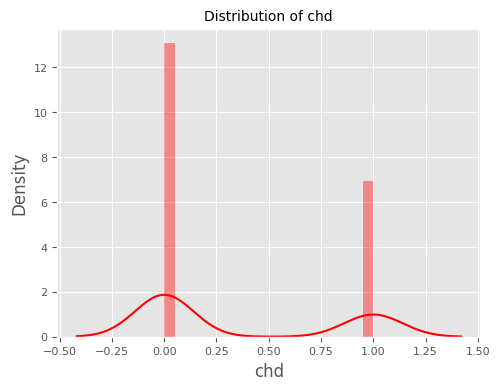

In [4]:
df = pd.read_csv("Heart.txt", index_col=0)

df['TrainTestFlag'] = 0
df.iloc[pd.Series(df.index).sample(frac=0.5, random_state=1234), df.columns.get_loc('TrainTestFlag')] = 1

# Check for exact duplicates
print("Checking duplicates")
print(df.duplicated(keep=False).sum())
print("")
# Univariate Analysis
print("Univariate Analysis")
chars = df.columns

d = pd.DataFrame(index = [0],columns=['Feature','Feature Type','# Records',"# Zero's","% Zero's","# Missing","% Missing","Minimum", "Mean", "Median", "Maximum", "Skewness","Kurtosis","Normality (p > 0.05)"])
d.to_csv('univariateAnalysis.csv')      

notApplicable = "N/A"
for z in range(len(chars)):
    a = pd.read_csv('univariateAnalysis.csv',index_col=0)  
    if(df[chars[z]].dtype !='object'):
        k2, p = stats.normaltest(df[chars[z]])
        dd = pd.DataFrame({'Feature':[chars[z]],
                            'Feature Type':df[chars[z]].dtype,
                            "# Records":len(df),
                            "# Zero's": (df[chars[z]] == 0).sum(),
                            "% Zero's" : round((df[chars[z]] == 0).sum()/df.size*100,2),
                            "# Missing" : (df[chars[z]].isna()).sum(),
                            "% Missing" : round((df[chars[z]].isna()).sum()/df.size*100,2),
                            "Minimum" : round(df[chars[z]].min(),2),
                            "Mean" : round(df[chars[z]].mean(),2),
                            "Median" : round(df[chars[z]].median(),2),
                            "Maximum" : round(df[chars[z]].max(),2),
                            "Skewness" : round(df[chars[z]].skew(),2), #Positive Skewness -> LEFT SKEW -> -> Threshold is -0.5 < x < 0.5
                            "Kurtosis" : round(df[chars[z]].kurt(),2), #Negative Kurtosis -> FAT TAILS -> -> Threshold is 3
                            "Normality (p > 0.05)" : round(p,3)}
                            )
        s = pd.concat([a, dd])
        s = s.dropna()
        s.to_csv('univariateAnalysis.csv')

    else:
        dd = pd.DataFrame({'Feature':[chars[z]],
                    'Feature Type':df[chars[z]].dtype,
                    "# Records": len(df),
                    "# Zero's": (df[chars[z]] == 0).sum(),
                    "% Zero's" : round((df[chars[z]] == 0).sum()/len(df)*100,1),
                    "# Missing" : (df[chars[z]].isna()).sum(),
                    "% Missing" : round((df[chars[z]].isna()).sum()/df.size*100,1),
                    "Minimum" : [notApplicable],
                    "Mean" : [notApplicable],
                    "Median" : [notApplicable],
                    "Maximum" : [notApplicable],
                    "Skewness" : [notApplicable],
                    "Kurtosis" : [notApplicable],
                    "Normality (p > 0.05)" : [notApplicable]}
                    )

        s = pd.concat([a, dd])
        s = s.dropna()
        s.to_csv('univariateAnalysis.csv')
display(s)
print("")


# Distribution of target variable
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=8)
sns.distplot(df['chd'],bins=20,color='r',ax=ax)
ax.set_title('Distribution of chd',fontsize = 10)


# From Categorical to Numeric transformation
display(df['famhist'].value_counts())
df['familiarity'] = np.where(df['famhist'] == "Absent",0,np.where(df['famhist'] == "Present",1,-1))
df = df.drop(columns=['famhist'],axis=1)


#Split Train vs Test -> 50% vs 50%
train = df.loc[df['TrainTestFlag'] == 1]
test = df.loc[df['TrainTestFlag'] == 0]

# Correlation
print("")
print("Train Sample - Correlation Analysis")
ds = train.drop(columns=['TrainTestFlag'], axis=1)
corr = ds.corr()
#display(corr)
display(corr.style.background_gradient(cmap='coolwarm'))
print("")


colList = list(df.columns)
colList.remove("TrainTestFlag")
colList.remove("chd")

if True:

    for i in range(len(colList)):
        if(train[colList[i]].dtype != object):
            d3, iv, infValue = featureMonotonicBinning(train['chd'], train[colList[i]], colList[i])
            print(colList[i]+" - Inf. Value: "+str(infValue))
            featureMonotonicBinning(train['chd'], train[colList[i]], colList[i])


            



3. MODEL TRAINING

In [5]:

for i in range(len(colList)):
    if(train[colList[i]].dtype != object):
        d3, iv, infValue = fMb(train['chd'], train[colList[i]], colList[i])
        print(colList[i]+" - Inf. Value: "+str(infValue))


from sklearn.model_selection import train_test_split
colsToDrop = ['chd','TrainTestFlag']

colsToKeep = ['sbp',
              ##'tobacco', 
              ##'ldl', 
              ##'adiposity',
              ##'typea',
              #'obesity', 
              #'alcohol',
              'age', 
              'familiarity'
              ]

# X_train = train.drop(columns=colsToDrop, axis=1)
# X_test = test.drop(columns=colsToDrop, axis=1)

colsToKeep

X_train = train[colsToKeep]
X_test = test[colsToKeep]


y_train = train['chd'].values
y_test = test['chd'].values

cols = X_train.columns
#Standardize features
for i in range(len(cols)):
    # Z-Score using scipy 
    X_train[cols[i]] = stats.zscore(X_train[cols[i]]) 

#Standardize features
for i in range(len(cols)):
    # Z-Score using scipy 
    X_test[cols[i]] = stats.zscore(X_test[cols[i]]) 


X1 = sm.add_constant(X_train)
logit = sm.Logit(y_train,X1)
results = logit.fit()
results.summary()

sbp - Inf. Value: 0.103
tobacco - Inf. Value: 0.314
ldl - Inf. Value: 0.27
adiposity - Inf. Value: 0.304
typea - Inf. Value: 0.02
obesity - Inf. Value: 0.088
alcohol - Inf. Value: 0.079
age - Inf. Value: 0.362
familiarity - Inf. Value: 0.277
Optimization terminated successfully.
         Current function value: 0.542981
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  231
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 May 2024   Pseudo R-squ.:                  0.1469
Time:                        10:37:48   Log-Likelihood:                -125.43
converged:                       True   LL-Null:                       -147.03
Covariance Type:            nonrobust   LLR p-value:                 2.219e-09
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8810      0.166     -5.311      0.000      -1.206      -0.556
sbp             0.2050      0.155      1.323      0.186      -0.099       0.509
age             0.7879      0.190      4.152      0.000       0.416       1.160
familiarity     0.4539      0.154      2.946      0.003       0.152       0.756
===============================================================================
"""

4. MODEL EVALUATION

Train Sample - Model accuracy score: 0.5411
                 
Train Gini:   49.7
                 


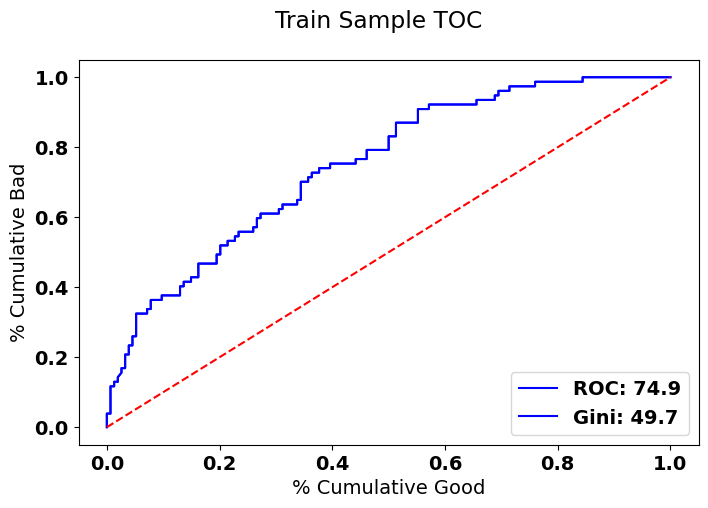


Test Sample - Model accuracy score: 0.7186
                 
Test Gini:   51.4
                 


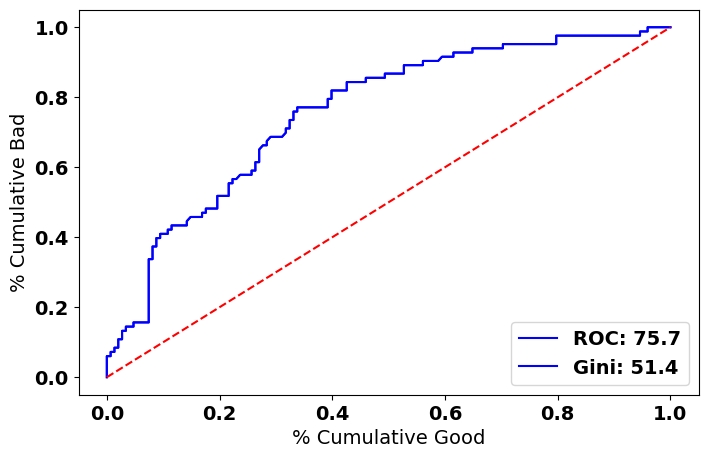

Confusion matrix

 [[132  16]
 [ 49  34]]

True Positives(TP) =  132

True Negatives(TN) =  34

False Positives(FP) =  16

False Negatives(FN) =  49
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       148
           1       0.68      0.41      0.51        83

    accuracy                           0.72       231
   macro avg       0.70      0.65      0.66       231
weighted avg       0.71      0.72      0.70       231



In [6]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X1, y_train)

y_pred_train = logreg.predict(X1)
y_pred_proba = results.predict(X1)
print('Train Sample - Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_train)))

fpr,tpr,threshold=roc_curve(y_train,y_pred_proba)
rocauc=auc(fpr,tpr)*100
x = round((rocauc-50)*2,1)

print("                 ")
print("Train Gini:  ",x)
print("                 ")


fig = plt.figure()    
fig.suptitle('Train Sample TOC')
ax1 = fig.add_subplot(1,1,1)
plt.plot(fpr,tpr,'b',label='ROC: %0.1f'% rocauc)
plt.plot(fpr,tpr,'b',label='Gini: %0.1f'% x)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('% Cumulative Good')
plt.ylabel('% Cumulative Bad')
plt.show()
print("")


X1 = sm.add_constant(X_test)
y_pred_test = logreg.predict(X1)
y_pred_proba = results.predict(X1)

print('Test Sample - Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
rocauc=auc(fpr,tpr)*100
x = round((rocauc-50)*2,1)

print("                 ")
print("Test Gini:  ",x)
print("                 ")


# fig = plt.figure()    
fig.suptitle('Test Sample TOC')
ax1 = fig.add_subplot(1,1,1)
plt.plot(fpr,tpr,'b',label='ROC: %0.1f'% rocauc)
plt.plot(fpr,tpr,'b',label='Gini: %0.1f'% x)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('% Cumulative Good')
plt.ylabel('% Cumulative Bad')
plt.show()


cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# # visualize confusion matrix with seaborn heatmap

print(classification_report(y_test, y_pred_test))



5. MODEL TRAINING - GRIDSEARCHCV and EVALUATION

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'random_state': 0}
accuracy : 0.701086956521739
Train Sample - Model accuracy score: 0.5801
                 
Train Gini:   52.6
                 


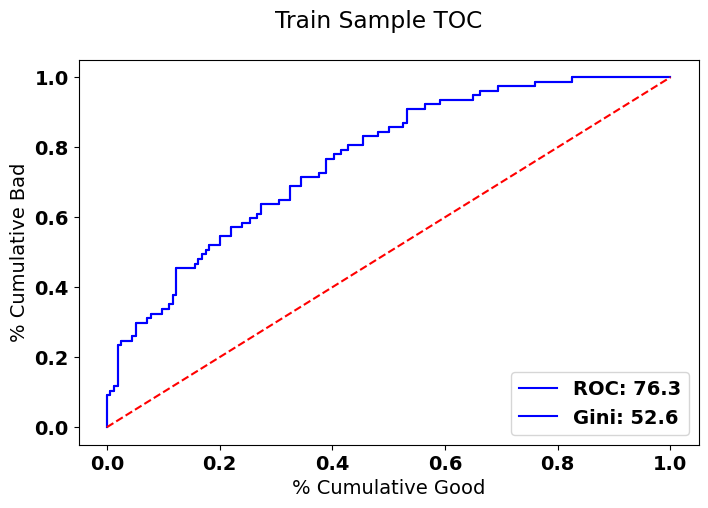


Test Sample - Model accuracy score: 0.7576
                 
Test Gini:   63.1
                 


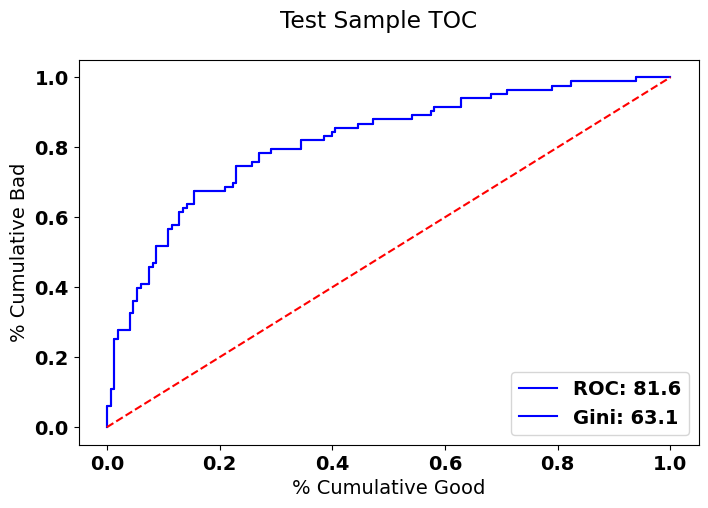

In [7]:
df = pd.read_csv("Heart.txt", index_col=0)
df['TrainTestFlag'] = 0
df.iloc[pd.Series(df.index).sample(frac=0.5, random_state=1234), df.columns.get_loc('TrainTestFlag')] = 1

df['familiarity'] = np.where(df['famhist'] == "Absent",0,np.where(df['famhist'] == "Present",1,-1))
df = df.drop(columns=['famhist'],axis=1)


#Split Train vs Test -> 50% vs 50%
train = df.loc[df['TrainTestFlag'] == 1]
test = df.loc[df['TrainTestFlag'] == 0]


colsToKeep = ['sbp',
              'tobacco', 
              'ldl', 
              'adiposity',
              'typea',
              'obesity', 
              'alcohol',
              'age', 
              'familiarity'
              ]


X_train = train[colsToKeep]
X_test = test[colsToKeep]


y_train = train['chd'].values
y_test = test['chd'].values

cols = X_train.columns
#Standardize features
for i in range(len(cols)):
    # Z-Score using scipy 
    X_train[cols[i]] = stats.zscore(X_train[cols[i]]) 

#Standardize features
for i in range(len(cols)):
    # Z-Score using scipy 
    X_test[cols[i]] = stats.zscore(X_test[cols[i]]) 


X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


# Gridsearch to determine the value of C and penalty factors
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "random_state" : [-1,0,1,2,3]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


# instantiate the model
logreg = LogisticRegression(C=0.1,penalty ="l2", random_state=0)
# fit the model
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_proba = logreg.predict_proba(X_train)[:,1]

print('Train Sample - Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_train)))

fpr,tpr,threshold=roc_curve(y_train,y_pred_proba)
rocauc=auc(fpr,tpr)*100
x = round((rocauc-50)*2,1)

print("                 ")
print("Train Gini:  ",x)
print("                 ")


fig = plt.figure()    
fig.suptitle('Train Sample TOC')
ax1 = fig.add_subplot(1,1,1)
plt.plot(fpr,tpr,'b',label='ROC: %0.1f'% rocauc)
plt.plot(fpr,tpr,'b',label='Gini: %0.1f'% x)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('% Cumulative Good')
plt.ylabel('% Cumulative Bad')
plt.show()
print("")



y_pred_test = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

print('Test Sample - Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
rocauc=auc(fpr,tpr)*100
x = round((rocauc-50)*2,1)

print("                 ")
print("Test Gini:  ",x)
print("                 ")


fig = plt.figure()    
fig.suptitle('Test Sample TOC')
ax1 = fig.add_subplot(1,1,1)
plt.plot(fpr,tpr,'b',label='ROC: %0.1f'% rocauc)
plt.plot(fpr,tpr,'b',label='Gini: %0.1f'% x)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('% Cumulative Good')
plt.ylabel('% Cumulative Bad')
plt.show()
